## Методы машинного обучения
### ИУ5-22М Ким Р.И.

### Лабараторная работа №1

In [35]:
##Importing Necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
#Reading sample Data
Sample_Store_Data = pd.read_excel("Sample - Superstore.xls")
#Viewing Sample Data
Sample_Store_Data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region', ylabel='count'>

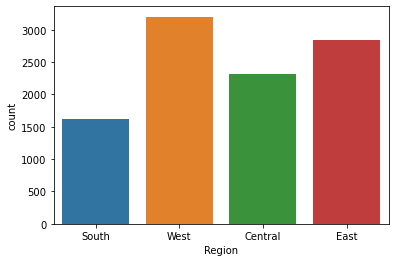

In [37]:
sns.countplot(Sample_Store_Data["Region"])

<BarContainer object of 4 artists>

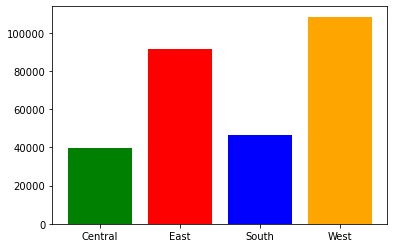

In [38]:
prices_by_reg = Sample_Store_Data.groupby('Region') ['Profit'].sum()
plt.bar(prices_by_reg.keys(), prices_by_reg, color = ['g', 'r', 'b', 'orange'])

In [39]:
#Separating Data For Analysis
Sample_Store_Data_Direct_Consumer = Sample_Store_Data[Sample_Store_Data["Segment"]=='Consumer']
Sample_Store_Data_Direct_Corporate_Segment = Sample_Store_Data[Sample_Store_Data["Segment"]=='Corporate']
Sample_Store_Data_Direct_Home_Office = Sample_Store_Data[Sample_Store_Data["Segment"]=='Home Office']

In [40]:
data_by_region = [Sample_Store_Data_Direct_Consumer.groupby('Region') ['Profit'].count(),
                  Sample_Store_Data_Direct_Corporate_Segment.groupby('Region') ['Profit'].count(),
                  Sample_Store_Data_Direct_Home_Office.groupby('Region') ['Profit'].count()]

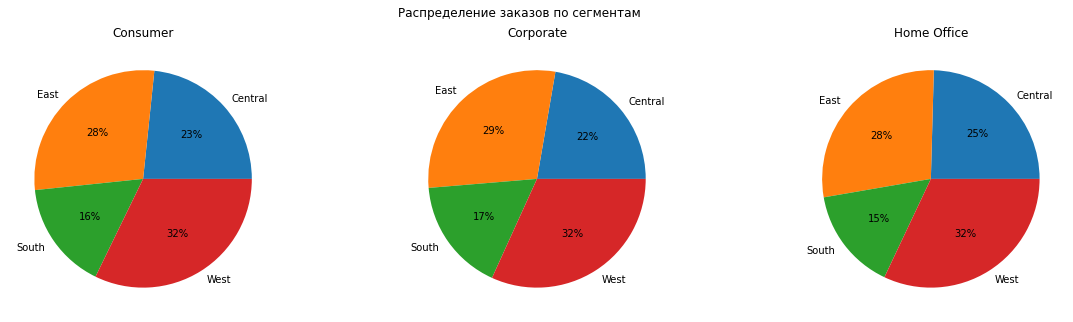

In [41]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Распределение заказов по сегментам')

ax1.pie(data_by_region[0], labels=data_by_region[0].keys(), autopct='%1.0f%%')
ax2.pie(data_by_region[1], labels=data_by_region[1].keys(), autopct='%1.0f%%')
ax3.pie(data_by_region[2], labels=data_by_region[2].keys(), autopct='%1.0f%%')
ax1.title.set_text('Consumer')
ax2.title.set_text('Corporate')
ax3.title.set_text('Home Office')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segment', ylabel='count'>

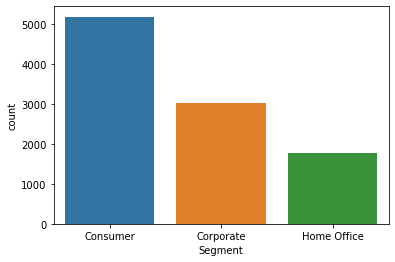

In [42]:
sns.countplot(Sample_Store_Data["Segment"])

In [43]:
#Creating a new column for profit percentage
Sample_Store_Data["Profit_Percentage"] = (Sample_Store_Data["Profit"]/Sample_Store_Data["Sales"])*100
#Separating Data For Analysis
Sample_Store_Data_Direct_Consumer = Sample_Store_Data[Sample_Store_Data["Segment"]=='Consumer']
Sample_Store_Data_Direct_Corporate_Segment = Sample_Store_Data[Sample_Store_Data["Segment"]=='Corporate']
Sample_Store_Data_Direct_Home_Office = Sample_Store_Data[Sample_Store_Data["Segment"]=='Home Office']

In [44]:
##Checking profit percent by category
np.mean(Sample_Store_Data_Direct_Consumer["Profit_Percentage"])

11.204952133156496

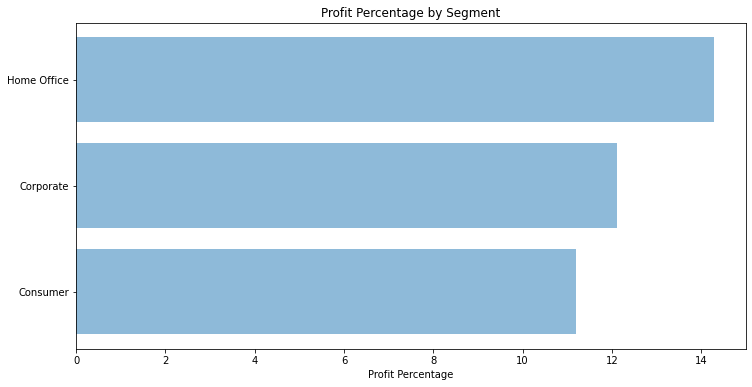

In [45]:
objects = ["Consumer","Corporate","Home Office"]
y_pos = np.arange(len(objects))
performance = [11.20,12.12,14.28]
plt.figure(figsize=(12,6))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel("Profit Percentage")
plt.title('Profit Percentage by Segment')
#plt.figure(figsize=(20,10))
plt.show()

In [46]:
#Checking distribution of Consumer profit percentage
Sample_Store_Data_Direct_Consumer["Profit_Percentage"].describe()

count    5191.000000
mean       11.204952
std        47.846643
min      -275.000000
25%         6.250000
50%        27.000000
75%        36.250000
max        50.000000
Name: Profit_Percentage, dtype: float64

In [47]:
average_profit = Sample_Store_Data_Direct_Consumer.groupby('Category') ['Profit_Percentage'].mean()
average_profit = pd.DataFrame(average_profit)
average_profit

,Profit_Percentage
Category,
Furniture,3.037962
Office Supplies,12.876053
Technology,15.268389


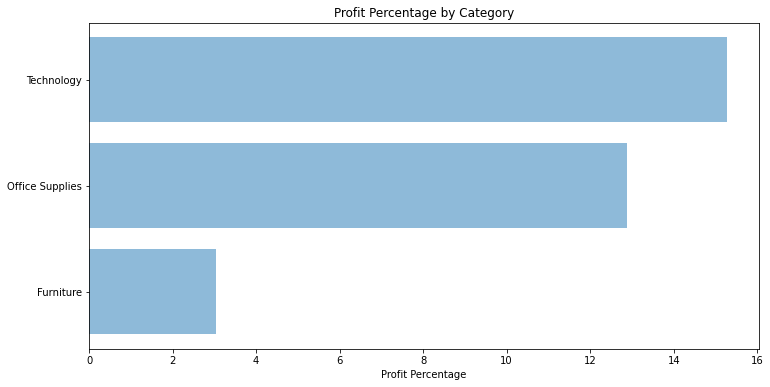

In [48]:
objects = average_profit.index
y_pos = np.arange(len(objects))
performance = average_profit["Profit_Percentage"]
plt.figure(figsize=(12,6))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel("Profit Percentage")
plt.title('Profit Percentage by Category')
#pLt.figure(figsize=(20,10))
plt.show()

<AxesSubplot:xlabel='Profit_Percentage'>

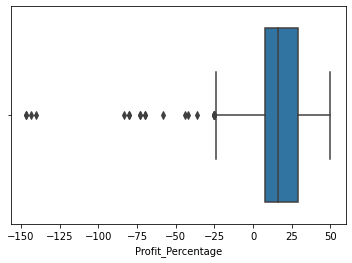

In [49]:
sns.boxplot(x=Sample_Store_Data_Direct_Consumer[Sample_Store_Data_Direct_Consumer["Category"]== "Technology"]["Profit_Percentage"])

<AxesSubplot:xlabel='Profit_Percentage'>

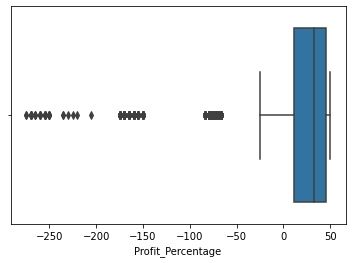

In [50]:
sns.boxplot(x=Sample_Store_Data_Direct_Consumer[Sample_Store_Data_Direct_Consumer["Category"]== "Office Supplies"]["Profit_Percentage"])

<AxesSubplot:xlabel='Profit_Percentage'>

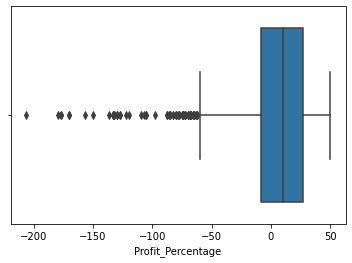

In [51]:
sns.boxplot(x=Sample_Store_Data_Direct_Consumer[Sample_Store_Data_Direct_Consumer["Category"]== "Furniture"]["Profit_Percentage"])

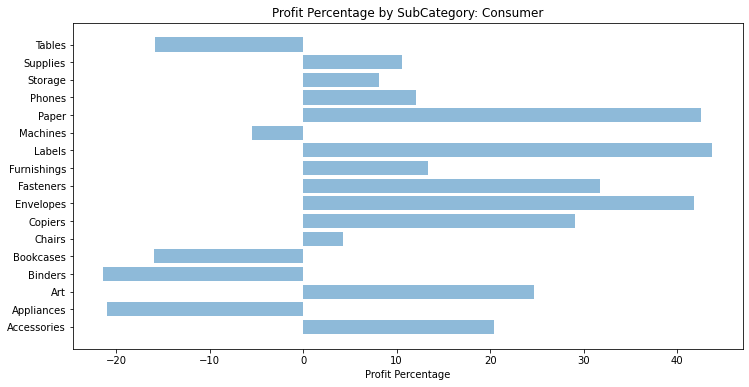

In [52]:
average_profit = Sample_Store_Data_Direct_Consumer.groupby('Sub-Category') ['Profit_Percentage'].mean()
average_profit = pd.DataFrame(average_profit)
objects = average_profit.index
y_pos = np.arange(len(objects))
performance = average_profit["Profit_Percentage"]
plt.figure(figsize=(12,6))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel("Profit Percentage")
plt.title('Profit Percentage by SubCategory: Consumer')
#pLt.figure(figsize=(20,10))
plt.show()

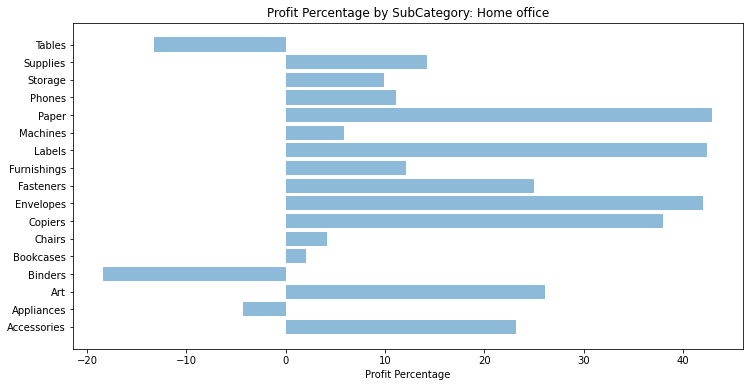

In [53]:
average_profit = Sample_Store_Data_Direct_Home_Office.groupby('Sub-Category') ['Profit_Percentage'].mean()
average_profit = pd.DataFrame(average_profit)
objects = average_profit.index
y_pos = np.arange(len(objects))
performance = average_profit["Profit_Percentage"]
plt.figure(figsize=(12,6))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel("Profit Percentage")
plt.title('Profit Percentage by SubCategory: Home office')
#pLt.figure(figsize=(20,10))
plt.show()

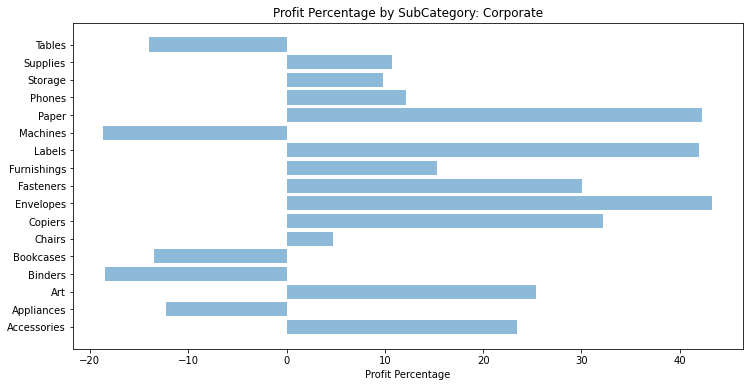

In [54]:
average_profit = Sample_Store_Data_Direct_Corporate_Segment.groupby('Sub-Category') ['Profit_Percentage'].mean()
average_profit = pd.DataFrame(average_profit)
objects = average_profit.index
y_pos = np.arange(len(objects))
performance = average_profit["Profit_Percentage"]
plt.figure(figsize=(12,6))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel("Profit Percentage")
plt.title('Profit Percentage by SubCategory: Corporate')
#pLt.figure(figsize=(20,10))
plt.show()

In [55]:
Sample_Store_Data_Direct_Home_Office

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit_Percentage
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580,-180.000000
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160,-150.000000
34,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.4720,3,0.20,9.9468,33.750000
37,38,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,Central,OFF-EN-10002986,Office Supplies,Envelopes,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",113.3280,9,0.20,35.4150,31.250000
38,39,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764,-8.823529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,9976,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,West,OFF-PA-10000743,Office Supplies,Paper,Xerox 1977,13.3600,2,0.00,6.4128,48.000000
9976,9977,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,West,TEC-PH-10002496,Technology,Phones,Cisco SPA301,249.5840,2,0.20,31.1980,12.500000
9977,9978,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,West,OFF-FA-10003467,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.8600,7,0.00,0.0000,0.000000
9978,9979,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,West,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,13.3760,4,0.20,4.6816,35.000000
